<a href="https://colab.research.google.com/github/fatihadr/UAS-NLP_Text-Classification/blob/main/UAS_NLP_(Resampling)_Modelling_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT UAS MATA KULIAH NATURAL LANGUAGE PROCESSING (NLP)**




*   Della Agustin (2215061116)
*   Syefara Raissa Ramdhan (2215061012)
*   Siti Fatiha Diza Rahman (2215061084)

**Link Streamlit:** https://text-classification-skripsi.streamlit.app/
*   Preprocessing : https://colab.research.google.com/drive/1-j50pbyVKeWOt4ZhQYlN3508_HAup7AW?usp=sharing
*   Modelling & Testing : https://colab.research.google.com/drive/1XHilCyYVt_vj5oAMTkXpGo2hAbeFtuTN?usp=sharing
*   (Resampling) Modelling & Testing : https://colab.research.google.com/drive/127mIg5wyjM8TsgefaVQ46Y3H3CogIx5l?usp=sharing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install Sastrawi

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# **Load Data**


In [ ]:
# Load CSV
gabung_df = pd.read_csv("/content/hasil_preprocessing.csv")
gabung_df


,eprintid,title,subjects,label
0,8282,peran gabunga kelompok tani gapoktan bakti mak...,630,600
1,11260,analys quality control product at limited part...,300,300
2,11260,analys quality control product at limited part...,350,300
3,11261,the role of interpersonal communication in the...,300,300
4,11261,the role of interpersonal communication in the...,302,300
...,...,...,...,...
33731,87739,kembang media video transkrip super franais ba...,440,400
33732,87740,guna media autentik majalah vogue france untuk...,300,300
33733,87740,guna media autentik majalah vogue france untuk...,370,300
33734,87741,analisis layak usaha produk telur asin ayam la...,630,600


In [ ]:
# cari yang null
gabung_df.isnull().sum()

,0
eprintid,0
title,1
subjects,0
label,0


In [ ]:
# hapus title yang null
gabung_df.dropna(subset=['title'], inplace=True)
gabung_df.isnull().sum()

,0
eprintid,0
title,0
subjects,0
label,0


# **Resampling mengunakan SMOTE**

In [ ]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X = vectorizer.fit_transform(gabung_df['title'])  # Pastikan sudah bersih
y = gabung_df['label']

# Encode labels (agar semua model bisa pakai label numerik)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


In [ ]:
# hasil: (n_samples, n_features)
X = vectorizer.fit_transform(gabung_df['title'])
print(X.shape)


(33735, 10000)


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3820, random_state=42)
X_train_svd = svd.fit_transform(X_train)  # hasil: dense
X_test_svd = svd.transform(X_test)

In [ ]:
# SMOTE hanya pada training set dan ubah X_train dari sparse ke dense
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_svd, y_train)


In [ ]:
# Tanpa class_weight karena kita sudah pakai SMOTE
model3 = LogisticRegression(max_iter=1000, random_state=42)
model3.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=1000, random_state=42)

=== Evaluasi Logistic Regression dengan SMOTE ===

Akurasi: 0.7026826737809396

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.53      0.47       474
         100       0.16      0.56      0.25        34
         200       0.00      0.00      0.00         5
         300       0.90      0.75      0.82      3194
         400       0.54      0.90      0.68       199
         500       0.62      0.70      0.66      1001
         600       0.74      0.65      0.69      1633
         700       0.30      0.71      0.42       119
         800       0.27      0.75      0.40         4
         900       0.29      0.70      0.41        84

    accuracy                           0.70      6747
   macro avg       0.43      0.63      0.48      6747
weighted avg       0.75      0.70      0.72      6747

F1 Score (Macro): 0.4798991981238279


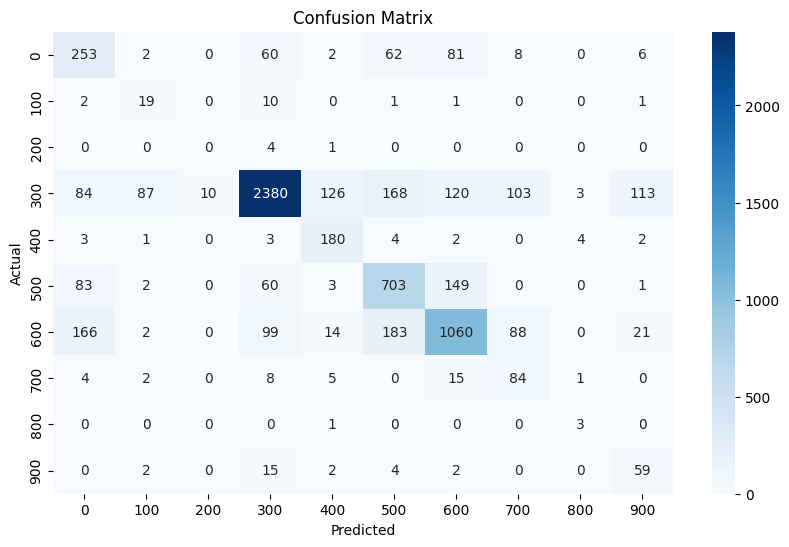

In [ ]:
# Prediksi
y_pred = model3.predict(X_test_svd)

# Evaluasi
print("=== Evaluasi Logistic Regression dengan SMOTE ===\n")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_], zero_division=0))

# F1 macro
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

# Confusion matrix (opsional)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **TESTING 3**

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return stemmer.stem(text)

def prediksi_judul3(judul_baru):
    judul_bersih = clean_text(judul_baru)
    judul_vector = vectorizer.transform([judul_bersih])
    # Apply SVD transformation to the new data
    judul_vector_svd = svd.transform(judul_vector)
    pred_encoded = model3.predict(judul_vector_svd)[0]
    pred_label = le.inverse_transform([pred_encoded])[0]
    return pred_label

In [ ]:
while True:
    judul_input = input("Masukkan judul skripsi (atau ketik 'exit' untuk keluar): ")
    if judul_input.lower() == 'exit':
        break

    hasil = prediksi_judul3(judul_input)
    print(f"Prediksi kelas untuk judul tersebut adalah: {hasil}")
    print("="*50)


Masukkan judul skripsi (atau ketik 'exit' untuk keluar): PENGARUH RPM DAN JUMLAH MASUKAN BATANG SINGKONG TERHADAP KINERJA MESIN RABAKONG TIPE TEP-6
Prediksi kelas untuk judul tersebut adalah: 0
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): PENGGUNAAN LAYANAN BIMBINGAN KELOMPOK TEKNIK DISKUSI UNTUK MENINGKATKAN SELF CONTROL SISWA KELAS X DI SMK SWADHIPA 2 NATAR TAHUN AJARAN 2023/2024
Prediksi kelas untuk judul tersebut adalah: 100
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): MANAJEMEN PENDIDIKAN DI SEMINARI MENENGAH SANTO PAULUS PALEMBANG
Prediksi kelas untuk judul tersebut adalah: 200
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): Strategi Komunikasi Persuasif Agen Asuransi Dalam Upaya Rekrutmen Agen Baru (Studi Pada Agen Asuransi PT Prudential Life Assurance Bandar Lampung)
Prediksi kelas untuk judul tersebut adalah: 300
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): TINDAK TUTUR EKSPRESIF DALAM NOVEL RANKING 1 KARYA SARA TEE DAN IMPLIKASINYA

# **Simpan Model**

In [ ]:
import pickle

import pickle

# Setelah svd.fit() dilakukan
with open('svd.pkl', 'wb') as f:
    pickle.dump(svd, f)

# Simpan model
with open('model.pkl', 'wb') as f:
    pickle.dump(model3, f)

# Simpan vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


Setelah menerapkan SMOTE, performa model memang mengalami sedikit peningkatan. Meskipun tidak terlalu signifikan, ada perbaikan pada sebaran prediksi antar kelas dan juga peningkatan pada metrik evaluasi seperti akurasi dan F1-score rata-rata. Ini menunjukkan bahwa SMOTE tetap membantu model dalam mengatasi masalah ketidakseimbangan data, meskipun dampaknya tidak terlalu besar.

Berdasarkan hasil tersebut, kami memilih model Logistic Regression yang sudah ditangani dengan SMOTE sebagai model akhir. Model ini kemudian digunakan untuk tahap berikutnya, yaitu diintegrasikan ke dalam aplikasi berbasis Streamlit, agar bisa digunakan secara langsung dan interaktif. Berikut link streamlitnya https://text-classification-skripsi.streamlit.app/